In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import pickle
folder_path = ("../results/Italy")
filename = "results.pickle"
with open(folder_path + "/" + filename, 'rb') as f:
    metrics = pickle.load(f)

In [3]:
mechanisms = ["GaussOpt_p1", "GaussOpt_p2", "GaussOpt_pinf", "GaussOpt_pinf_IntOpt"]
markers = [["-s", "-*", "-v", "-8", "-P"], ["--s", "--*", "--v", "--8", "--P"]]
colors = ["blue", "orange", "red", "green"]
geo_level = 3
levels: list[tuple] = [(i, i) if i == j else (i, j) for i in range(geo_level + 1) for j in range(i, i + 2) if
                       j < geo_level + 1]

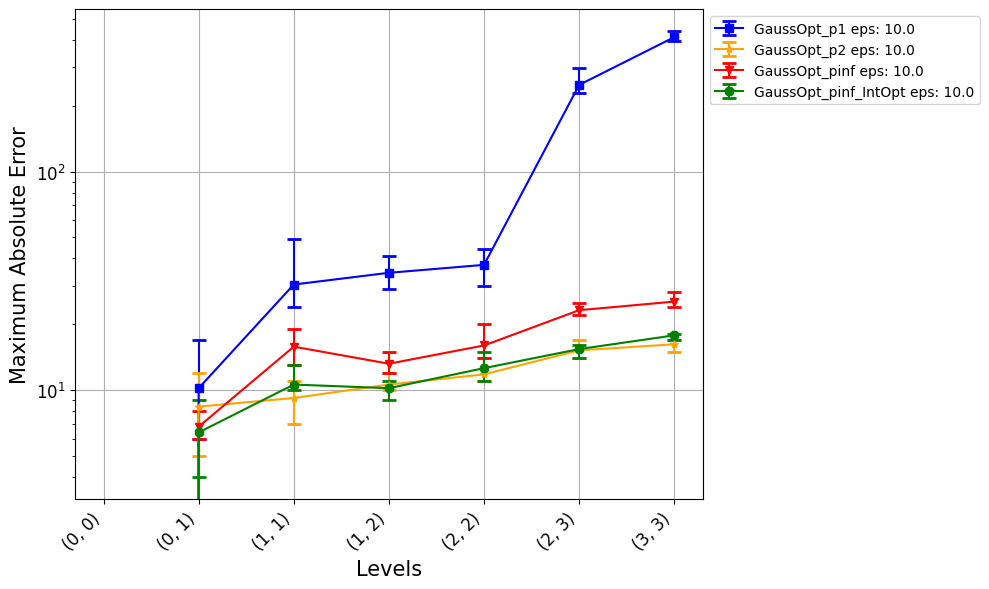

In [12]:
# plot line
import matplotlib.pyplot as plt

array = metrics["max_error"]
fig, ax = plt.subplots(figsize=(10, 6))
for i, mechanism in enumerate(mechanisms):
    for j, epsilon in enumerate(metrics["epsilons"]):
        # plot error bar line for each level using min max
        error = np.array([np.mean(array[i, j], axis=0) - np.min(array[i, j], axis=0),
                          np.max(array[i, j], axis=0) - np.mean(array[i, j], axis=0)])
        ax.errorbar(range(len(levels)), np.mean(array[i, j], axis=0), yerr=error,
                    label=mechanism + f" eps: {epsilon}",
                    fmt=markers[j][i], color=colors[i], capsize=5, capthick=2)
ax.set_yscale("log")
# Setting labels and ticks
ax.set_ylabel("Maximum Absolute Error", fontsize=15)
ax.set_xlabel("Levels", fontsize=15)  # Optional: Add an x-label for clarity
ax.set_xticks(range(len(levels)))
ax.set_xticklabels(levels, rotation=45, ha='right')  # Set oblique labels
# augment font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Display the plot
plt.grid(True)
plt.tight_layout()
# plt.savefig(f"../plots/Italy/max_error_nolegend.pdf", dpi=300)
# Adding a legend
plt.legend()
# put the legend outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# save
plt.tight_layout()
# plt.savefig(f"../plots/Italy/max_error.pdf", dpi=300)
plt.show()

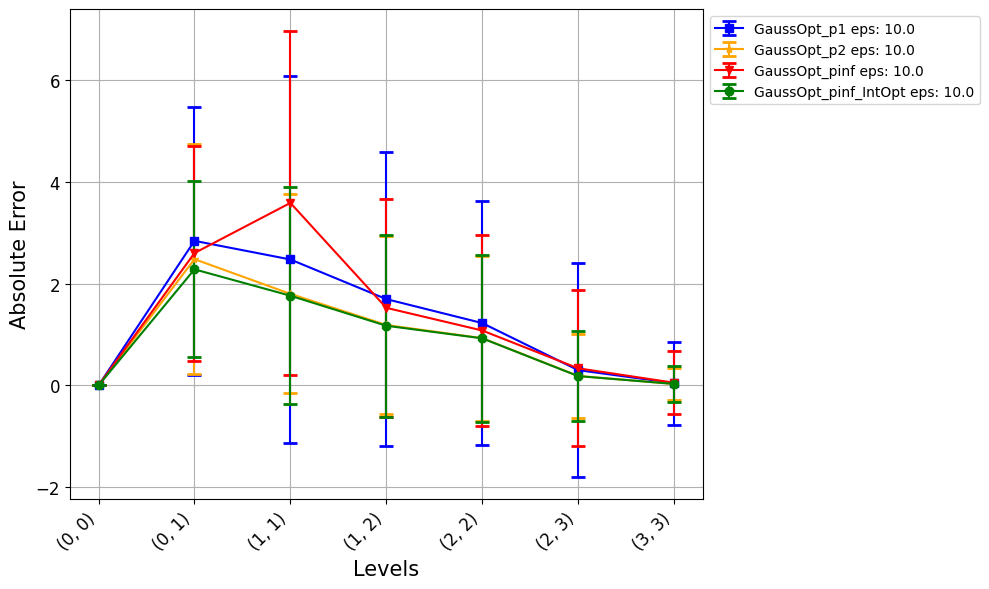

In [18]:
# plot line
import matplotlib.pyplot as plt

MAE = metrics["MAE"]
std = metrics["std"]
fig, ax = plt.subplots(figsize=(10, 6))
for i, mechanism in enumerate(mechanisms):
    for j, epsilon in enumerate(metrics["epsilons"]):
        ax.errorbar(range(len(levels)), MAE[i, j], yerr=std[i, j],
                    label=mechanism + f" eps: {epsilon}",
                    fmt=markers[j][i], color=colors[i], capsize=5, capthick=2)
# ax.set_yscale("log")
# Setting labels and ticks
ax.set_ylabel("Absolute Error", fontsize=15)
ax.set_xlabel("Levels", fontsize=15)  # Optional: Add an x-label for clarity
ax.set_xticks(range(len(levels)))
ax.set_xticklabels(levels, rotation=45, ha='right')  # Set oblique labels
# augment font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Display the plot
plt.grid(True)
plt.tight_layout()
# plt.savefig(f"../plots/Italy/mean_absolute_error_nolegend.pdf", dpi=300)
# Adding a legend
plt.legend()
# put the legend outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# save
plt.tight_layout()
# plt.savefig(f"../plots/Italy/mean_absolute_error.pdf", dpi=300)
plt.show()

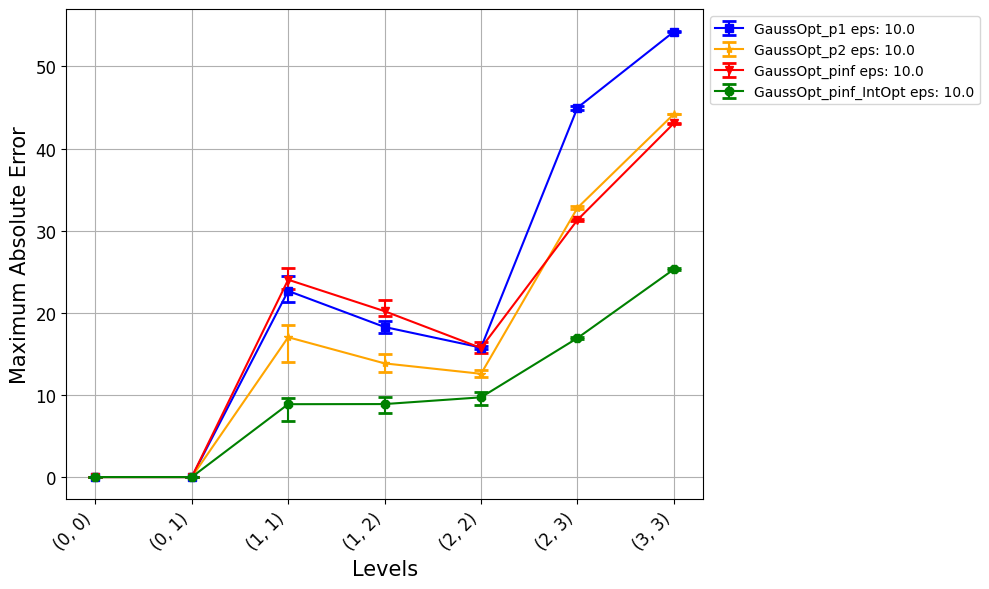

In [16]:
# plot line
import matplotlib.pyplot as plt

array = metrics["false_discovery_rate"]
fig, ax = plt.subplots(figsize=(10, 6))
for i, mechanism in enumerate(mechanisms):
    for j, epsilon in enumerate(metrics["epsilons"]):
        # plot error bar line for each level using min max
        error = np.array([np.mean(array[i, j], axis=0) - np.min(array[i, j], axis=0),
                          np.max(array[i, j], axis=0) - np.mean(array[i, j], axis=0)])
        ax.errorbar(range(len(levels)), np.mean(array[i, j], axis=0), yerr=error,
                    label=mechanism + f" eps: {epsilon}",
                    fmt=markers[j][i], color=colors[i], capsize=5, capthick=2)
# Setting labels and ticks
ax.set_ylabel("Maximum Absolute Error", fontsize=15)
ax.set_xlabel("Levels", fontsize=15)  # Optional: Add an x-label for clarity
ax.set_xticks(range(len(levels)))
ax.set_xticklabels(levels, rotation=45, ha='right')  # Set oblique labels
# augment font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Display the plot
plt.grid(True)
plt.tight_layout()
# plt.savefig(f"../plots/Italy/max_error_nolegend.pdf", dpi=300)
# Adding a legend
plt.legend()
# put the legend outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# save
plt.tight_layout()
# plt.savefig(f"../plots/Italy/max_error.pdf", dpi=300)
plt.show()

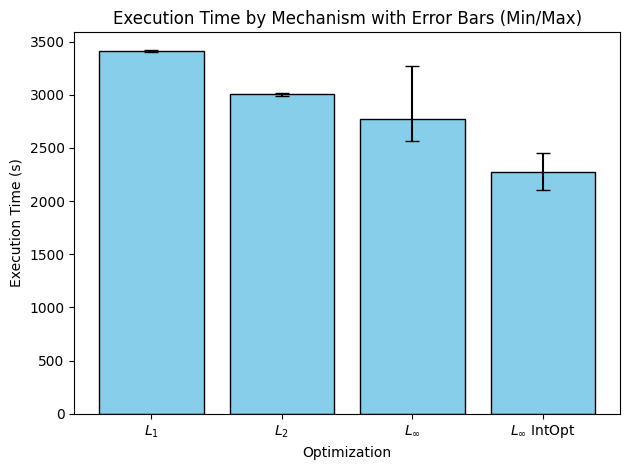

In [41]:
import numpy as np
import matplotlib.pyplot as plt

execution_times = metrics["TIME"].copy()
# Reshape to (n_mechanisms, n_experiments)
execution_times = execution_times.squeeze(axis=1)

# Compute mean, min, and max for each mechanism
mean_times = execution_times.mean(axis=1)
min_times = execution_times.min(axis=1)
max_times = execution_times.max(axis=1)

# Compute error bars
error_bars = [mean_times - min_times, max_times - mean_times]

# Plot
mechanisms = ["$L_1$", "$L_2$", "$L_\infty$", "$L_\infty$ IntOpt"]
x_positions = np.arange(len(mechanisms))

plt.bar(x_positions, mean_times, yerr=error_bars, capsize=5, color='skyblue', edgecolor='black', linewidth=1)
plt.xticks(x_positions, mechanisms)
plt.ylabel("Execution Time (s)")
plt.xlabel("Optimization")
plt.title("Execution Time by Mechanism with Error Bars (Min/Max)")
plt.tight_layout()
plt.show()